<a href="https://colab.research.google.com/github/LarsBryld/socialdataanalysis2020/blob/master/Oxford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

ox = pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

covid = pd.read_csv("https://open-covid-19.github.io/data/data.csv")



#Define focus contries based on stock indecies
focuscountries = set(['China', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Italy', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Netherlands', 'Poland', 'Portugal', 'Spain',
                  'Sweden', 'Switzerland', 'United Kingdom', 'Canada', 'United States', 'Australia', 'New Zealand', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
                  'Taiwan', 'Brazil', 'Israel', 'India', 'Mexico', 'South Africa', 'Russia'])


#Create dataframes of only focus countries
#ox = ox[ox['CountryName'].isin(focuscountries)]
covid = covid[covid['CountryName'].isin(focuscountries)]


#Sometimes, due to data entry errors, we have isgeneral=1 when the underlying indicator is 0 or null. These cases should be disregarded. Only use isgeneral=1 values when the underlying indicator is 1 or higher.
cond1 = ((ox['CountryName'] == 'Denmark'))

#test = ox.where(cond=cond1,inplace=False)


ox = ox[(ox['S1_IsGeneral'] != 1) & (ox['S1_School closing'] > 0)]
#ox =  (ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0) 
#ox = ox[(ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0)]
#ox = ox[(ox['S3_IsGeneral'] != 1) & (ox['S3_Cancel public events'] > 0)]
#ox = ox[(ox['S4_IsGeneral'] != 1) & (ox['S4_Close public transport'] > 0)]
#ox = ox[(ox['S5_IsGeneral'] != 1) & (ox['S5_Public information campaigns'] > 0)]
#ox = ox[(ox['S6_IsGeneral'] != 1) & (ox['S6_Restrictions on internal movement'] > 0)]
#drop2 = ox[(ox['S1_IsGeneral'] == 1) & (ox['S1_School closing'] == 0)] 



#Nine of the indicators (S1–S7, S12 and S13) take policies such as school closures, travel bans, etc, and are recorded on an ordinal scale
policies = ox[['CountryName', 'Date', 'S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S3_Cancel public events', 'S4_Close public transport', 'S5_Public information campaigns', 'S6_Restrictions on internal movement', 'S7_International travel controls']]

#the others (S8–S11) are financial indicators such as fiscal or monetary measures
financial = ox[['CountryName', 'Date', 'S8_Fiscal measures', 'S9_Monetary measures', 'S10_Emergency investment in health care', 'S11_Investment in Vaccines']]

#The tracker aggregates the policy scores (not the financial scores) into a common ‘Stringency Index’.
stringency = ox[['CountryName', 'Date', 'StringencyIndex']]

ox_country = (ox['CountryName']).unique()


In [37]:
ox_den = ox[ox['CountryName'] == 'Denmark']
covid_den = covid[covid['CountryName'] == 'Denmark']

ox['CountryName'].unique()
ox['CountryName']


313                    Angola
635      United Arab Emirates
636      United Arab Emirates
637      United Arab Emirates
638      United Arab Emirates
                 ...         
17135                  Taiwan
17136                  Taiwan
17137                  Taiwan
17138                  Taiwan
17139                  Taiwan
Name: CountryName, Length: 561, dtype: object

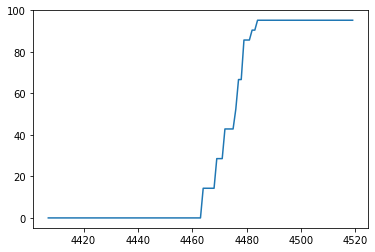

In [3]:


string = den['StringencyIndex']
cases = den['ConfirmedCases']       

string.plot.line()
#cases.plot.line()

A full description of the strengency index can be found here: 

https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Additional desciption on a less detailed level: 

https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker



In [0]:
ox.head()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S2_Workplace closing,S2_IsGeneral,S3_Cancel public events,S3_IsGeneral,S4_Close public transport,S4_IsGeneral,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S6_IsGeneral,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 26
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t


equals(self, other)

Test whether two objects contain the same elements.

https://pandas.pydata.org/docs/getting_started/basics.html


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

